<a href="https://colab.research.google.com/github/Tanish-Dev/SKILL-experiments/blob/main/ALL_Data_Science_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment 1: Loading and Merging the Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset from UCI ML repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

# Display first few records
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Experiment 2: Data Preprocessing - Cleaning the Dataset

In [2]:

data.replace('?', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.isnull().sum()
cleaned_data = data.dropna()
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Experiment 3: Data Preprocessing - Applying Encoding Techniques

In [3]:

from sklearn.preprocessing import LabelEncoder

encoded_data = cleaned_data.copy()
le = LabelEncoder()
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    encoded_data[col] = le.fit_transform(encoded_data[col])
encoded_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,2
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


### Experiment 4: Data Preprocessing - Normalizing, Scaling, and Balancing

In [4]:

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
scaled_data = encoded_data.copy()
scaled_data[scaled_data.columns[:-1]] = scaler.fit_transform(scaled_data[scaled_data.columns[:-1]])
X = scaled_data.drop('target', axis=1)
y = scaled_data['target']
smote = SMOTE()
X_bal, y_bal = smote.fit_resample(X, y)
X_bal.shape, y_bal.value_counts()


((800, 13),
 target
 0    160
 2    160
 1    160
 3    160
 4    160
 Name: count, dtype: int64)

### Experiment 5: Data Visualization using Matplotlib - Part 1

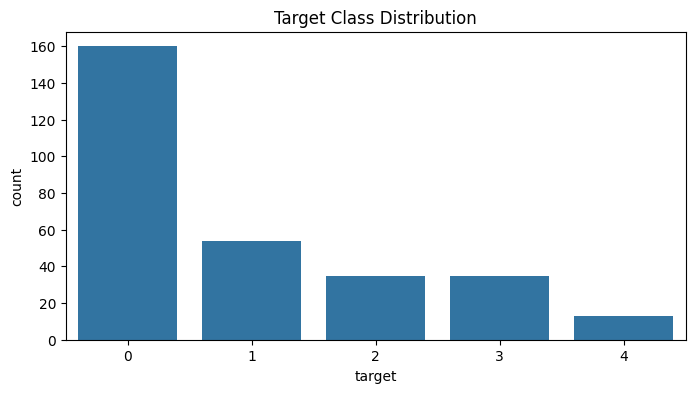

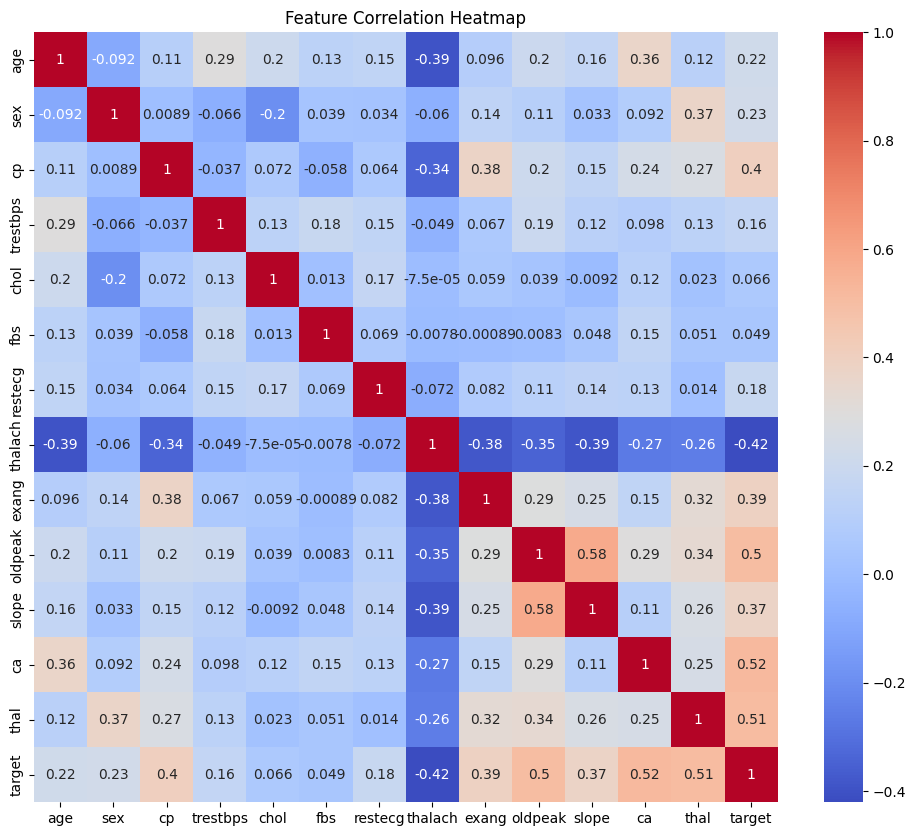

In [5]:

plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=encoded_data)
plt.title("Target Class Distribution")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


### Experiment 6: Data Visualization using Matplotlib - Part 2

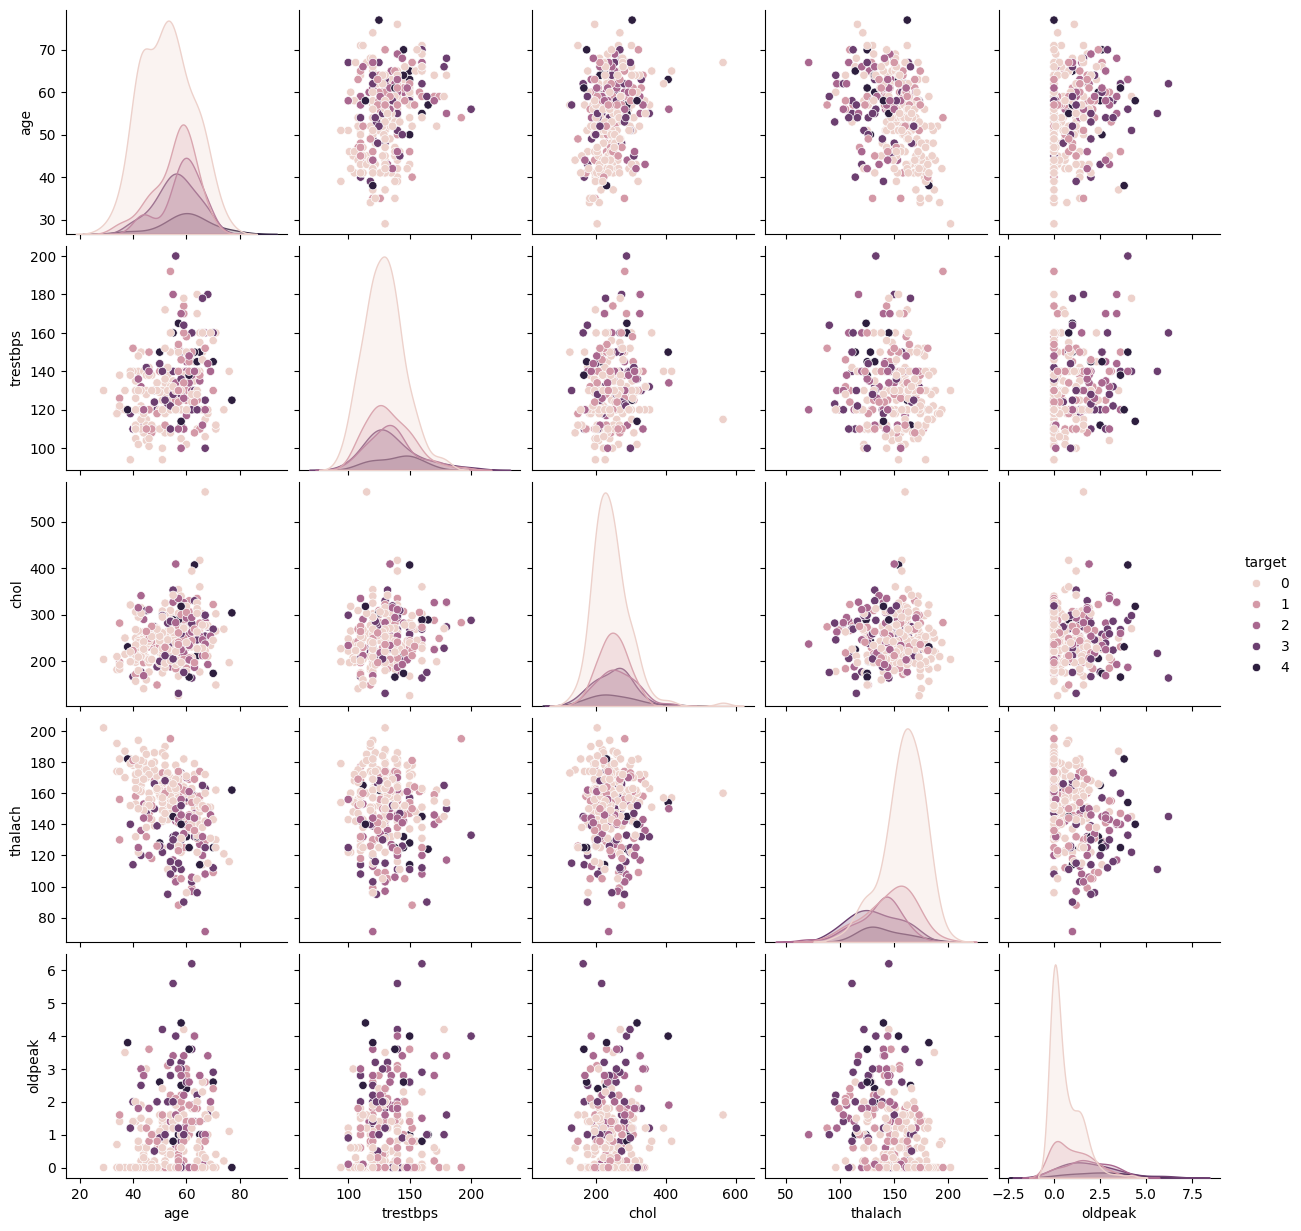

In [6]:

sns.pairplot(encoded_data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.show()


### Experiment 7: Filter Feature Selection Techniques - Part 1

In [9]:

from sklearn.feature_selection import SelectKBest, chi2, f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=10) # Changed score_func to f_classif
fit = bestfeatures.fit(X_bal, y_bal)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
featureScores.nlargest(10, 'Score')


,Feature,Score
12,thal,90.676926
11,ca,83.678884
2,cp,70.925740
9,oldpeak,64.541321
7,thalach,48.379650
10,slope,44.701087
8,exang,35.371964
6,restecg,28.107156
0,age,26.596046
1,sex,18.431032


### Experiment 8: Filter Feature Selection Techniques - Part 2

In [10]:

correlation = encoded_data.corr()
correlation['target'].sort_values(ascending=False)


,target
target,1.000000
ca,0.521178
thal,0.507323
oldpeak,0.501461
cp,0.404248
exang,0.391613
slope,0.374689
sex,0.226797
age,0.222156
restecg,0.184136


### Experiment 9: Wrapper Feature Selection Technique - Part 1

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_bal, y_bal)
X.columns[fit.support_]


Index(['cp', 'restecg', 'slope', 'ca', 'thal'], dtype='object')

### Experiment 10: Wrapper Feature Selection Technique - Part 2

In [12]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
rfe_dt = RFE(dt_model, n_features_to_select=5)
fit_dt = rfe_dt.fit(X_bal, y_bal)
X.columns[fit_dt.support_]


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

### Experiment 11: Embedded Feature Selection Techniques

In [13]:

from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(X_bal, y_bal)
X.columns[(lasso.coef_ != 0)]


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### Experiment 12: Using Different Supervised ML Classifiers

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))



Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.45      0.42      0.43        36
           2       0.20      0.24      0.22        25
           3       0.53      0.48      0.51        33
           4       0.76      0.72      0.74        36

    accuracy                           0.54       160
   macro avg       0.54      0.53      0.53       160
weighted avg       0.55      0.54      0.55       160

Confusion Matrix:
 [[24  4  1  1  0]
 [ 8 15  6  6  1]
 [ 0  6  6  7  6]
 [ 0  7  9 16  1]
 [ 1  1  8  0 26]]

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.79      0.72      0.75        36
           2       0.78      1.00      0.88        25
           3       0.89      0.97      0.93        33
           4       0.97      0.92      0.94       